# Implementing K-Nearest Neighbours algorithm over the data of the month April 2014

# This algo uses the Latitude and Longitude of a location and predicts the "Base" to which that location point belongs to

## Importing required packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
sns.set()

## Reading data

In [2]:
df = pd.read_csv("./Uber-dataset/uber-raw-data-apr14.csv")
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
df.shape

(564516, 4)

## Extracting all the unique bases 

In [4]:
k=df["Base"]
k=list(set(k))
print(k)

['B02682', 'B02598', 'B02617', 'B02764', 'B02512']


## Encoding all the bases to numbers 

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Base'] = labelencoder.fit_transform(df['Base'])
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,0
1,4/1/2014 0:17:00,40.7267,-74.0345,0
2,4/1/2014 0:21:00,40.7316,-73.9873,0
3,4/1/2014 0:28:00,40.7588,-73.9776,0
4,4/1/2014 0:33:00,40.7594,-73.9722,0


## Plot the locations using longitude(Lon) and latitude(Lan)

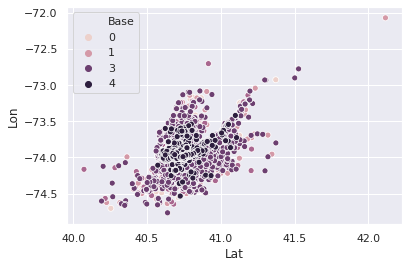

In [6]:
sns.scatterplot(
    x='Lat',
    y='Lon',
    hue='Base',
    data=df
)

### Predicting base (i.e, encoded value of base) given Lat and Lon using K-Nearest Neighbours(KNN) algorithm 

### First drop all the coloums which are not useful and create feature columns and class column

In [7]:
X = df.drop(['Base', 'Date/Time'], axis=1)
y = df.Base

### Splitting the columns into train and test data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### Training the KNN model

In [9]:
knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

### Predicting the base for test data with help of trained model

In [10]:
y_pred = knn.predict(X_test)

### Creating a Confusion Matrix to analyse the performance of the model

In [11]:
confusion_matrix(y_test, y_pred)

array([[   53,  2675,   204,  5882,     0],
       [   34, 13823,   973, 31204,     0],
       [   19,  8136,   738, 17912,     0],
       [   55, 16815,  1205, 38906,     0],
       [    1,   755,    57,  1682,     0]])

### displaying the accuracy of the model

In [12]:
accuracy = accuracy_score(y_test, y_pred)*100
print("accuracy: " + str(accuracy))

accuracy: 37.92275152520035


### displaying the classification report

In [13]:
classi_report = classification_report(y_test, y_pred)
print(classi_report)

              precision    recall  f1-score   support

           0       0.33      0.01      0.01      8814
           1       0.33      0.30      0.31     46034
           2       0.23      0.03      0.05     26805
           3       0.41      0.68      0.51     56981
           4       0.00      0.00      0.00      2495

    accuracy                           0.38    141129
   macro avg       0.26      0.20      0.18    141129
weighted avg       0.34      0.38      0.32    141129



/home/gayathri/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
